In [1]:
# Load required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
import nltk
from scipy import sparse
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.linear_model import SGDRegressor, SGDClassifier
from sklearn.externals import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import (
    learning_curve, StratifiedShuffleSplit, cross_val_score, ShuffleSplit,
    cross_val_predict, RandomizedSearchCV
)
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Set figure display options
%matplotlib inline
#sns.set(context='notebook', style='darkgrid')
#sns.set(font_scale=1.3)

In [2]:
section1_df_full = joblib.load('/Users/shwetapai/Desktop/finalsection1_all_features.pkl')

In [3]:
section1_df_full.columns

Index(['index', 'num_sents', 'num_words', 'num_all_caps', 'percent_all_caps',
       'num_exclms', 'percent_exclms', 'num_imp_words', 'percent_imp_words',
       'avg_words_per_sent', 'num_paragraphs', 'avg_sents_per_paragraph',
       'avg_words_per_paragraph', 'num_images', 'num_videos', 'num_youtubes',
       'num_hyperlinks', 'num_bolded', 'percent_bolded', 'normalized_text',
       'name', 'category', 'hyperlink', 'currency', 'pledged', 'goal',
       'location', 'funded'],
      dtype='object')

In [4]:
empty_cols=['index', 'num_sents', 'num_words', 'num_all_caps', 'percent_all_caps',
       'num_exclms', 'percent_exclms', 'num_imp_words', 'percent_imp_words',
       'avg_words_per_sent', 'num_paragraphs', 'avg_sents_per_paragraph',
       'avg_words_per_paragraph', 'num_images', 'num_videos', 'num_youtubes',
       'num_hyperlinks', 'num_bolded', 'percent_bolded', 'normalized_text',
       'name', 'hyperlink', 'currency', 'pledged', 'goal',
       'location','category', 'funded']
for i in empty_cols:
    section1_df_full[i]=section1_df_full[i].replace(" ",np.nan)

In [5]:
section1_df_full=section1_df_full.dropna()

In [7]:
section1_df_full.head()

,index,num_sents,num_words,num_all_caps,percent_all_caps,num_exclms,percent_exclms,num_imp_words,percent_imp_words,avg_words_per_sent,...,percent_bolded,normalized_text,name,category,hyperlink,currency,pledged,goal,location,funded
0,2,54.0,1147.0,2.0,0.001744,2.0,0.001744,1.0,0.000872,21.240741,...,0.000000,It is the numbrst century! Flying cars and tim...,LoadAUF - The Autonomous User Follower,Robots,https://www.kickstarter.com/projects/154469338...,USD,49.0,3000.0,"Miami, FL",False
1,3,63.0,1051.0,10.0,0.009515,4.0,0.003806,0.0,0.000000,16.682540,...,0.000000,"httpaddr Hello, I'm Aryn Sparks, inventor of p...",Project RoBro- The learning raspberry pi brain!,Robots,https://www.kickstarter.com/projects/192623886...,USD,5.5,25000.0,"San Angelo, TX",False
2,4,136.0,2146.0,16.0,0.007456,1.0,0.000466,0.0,0.000000,15.779412,...,0.018639,There are a lot of robots in the world. But mo...,Jerry: An Affordable Personal Robot,Robots,https://www.kickstarter.com/projects/slantrobo...,USD,3290.0,20000.0,"Boise, ID",False
3,7,77.0,1006.0,13.0,0.012922,7.0,0.006958,0.0,0.000000,13.064935,...,0.000000,Omorobot OMOROBOT is a small venture company...,DonkiBot,Robots,https://www.kickstarter.com/projects/235508607...,USD,6835.0,500000.0,"Germantown, MD",False
4,8,29.0,636.0,3.0,0.004717,1.0,0.001572,0.0,0.000000,21.931034,...,0.000000,"Robotics in industry, education, and personal ...",The G.E.N.E.S.I.S. Robotics Platform,Robots,https://www.kickstarter.com/projects/rickrobot...,USD,156.0,50000.0,"Waverly, IA",False


In [8]:
#applying sentiment to the 'normalized_text column'
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

def sentiment(x):
    score = sid.polarity_scores(x)
    return score['compound']
    
#sentiment(happy)X
section1_df_full['sentiment']= section1_df_full['normalized_text'].apply(lambda x : sentiment(x))
section1_df_full.head()

/Users/shwetapai/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,index,num_sents,num_words,num_all_caps,percent_all_caps,num_exclms,percent_exclms,num_imp_words,percent_imp_words,avg_words_per_sent,...,normalized_text,name,category,hyperlink,currency,pledged,goal,location,funded,sentiment
0,2,54.0,1147.0,2.0,0.001744,2.0,0.001744,1.0,0.000872,21.240741,...,It is the numbrst century! Flying cars and tim...,LoadAUF - The Autonomous User Follower,Robots,https://www.kickstarter.com/projects/154469338...,USD,49.0,3000.0,"Miami, FL",False,0.9986
1,3,63.0,1051.0,10.0,0.009515,4.0,0.003806,0.0,0.000000,16.682540,...,"httpaddr Hello, I'm Aryn Sparks, inventor of p...",Project RoBro- The learning raspberry pi brain!,Robots,https://www.kickstarter.com/projects/192623886...,USD,5.5,25000.0,"San Angelo, TX",False,0.9979
2,4,136.0,2146.0,16.0,0.007456,1.0,0.000466,0.0,0.000000,15.779412,...,There are a lot of robots in the world. But mo...,Jerry: An Affordable Personal Robot,Robots,https://www.kickstarter.com/projects/slantrobo...,USD,3290.0,20000.0,"Boise, ID",False,0.9996
3,7,77.0,1006.0,13.0,0.012922,7.0,0.006958,0.0,0.000000,13.064935,...,Omorobot OMOROBOT is a small venture company...,DonkiBot,Robots,https://www.kickstarter.com/projects/235508607...,USD,6835.0,500000.0,"Germantown, MD",False,0.9992
4,8,29.0,636.0,3.0,0.004717,1.0,0.001572,0.0,0.000000,21.931034,...,"Robotics in industry, education, and personal ...",The G.E.N.E.S.I.S. Robotics Platform,Robots,https://www.kickstarter.com/projects/rickrobot...,USD,156.0,50000.0,"Waverly, IA",False,0.9861


In [9]:
#saving the entire dataset
joblib.dump(section1_df_full, 'entire_dataset.pkl')


['entire_dataset.pkl']

**Selecting Imp Features**

In [11]:
features=['num_sents', 'num_words', 'num_all_caps', 'percent_all_caps',
       'num_exclms', 'percent_exclms', 'num_imp_words', 'percent_imp_words',
       'avg_words_per_sent', 'num_paragraphs', 'avg_sents_per_paragraph',
       'avg_words_per_paragraph', 'num_images', 'num_videos', 'num_youtubes',
       'num_hyperlinks', 'num_bolded', 'percent_bolded','sentiment']

#making a dataset with only features listed above

X = section1_df_full[features]
X.head()


,num_sents,num_words,num_all_caps,percent_all_caps,num_exclms,percent_exclms,num_imp_words,percent_imp_words,avg_words_per_sent,num_paragraphs,avg_sents_per_paragraph,avg_words_per_paragraph,num_images,num_videos,num_youtubes,num_hyperlinks,num_bolded,percent_bolded,sentiment
0,54.0,1147.0,2.0,0.001744,2.0,0.001744,1.0,0.000872,21.240741,28.0,2.428571,40.392857,2.0,1.0,0.0,0.0,0.0,0.000000,0.9986
1,63.0,1051.0,10.0,0.009515,4.0,0.003806,0.0,0.000000,16.682540,42.0,1.857143,25.357143,4.0,0.0,0.0,4.0,0.0,0.000000,0.9979
2,136.0,2146.0,16.0,0.007456,1.0,0.000466,0.0,0.000000,15.779412,82.0,2.000000,25.512195,18.0,1.0,3.0,3.0,40.0,0.018639,0.9996
3,77.0,1006.0,13.0,0.012922,7.0,0.006958,0.0,0.000000,13.064935,47.0,1.595745,20.638298,34.0,11.0,0.0,0.0,0.0,0.000000,0.9992
4,29.0,636.0,3.0,0.004717,1.0,0.001572,0.0,0.000000,21.931034,10.0,3.100000,62.600000,2.0,0.0,0.0,1.0,0.0,0.000000,0.9861


In [12]:
X.columns


Index(['num_sents', 'num_words', 'num_all_caps', 'percent_all_caps',
       'num_exclms', 'percent_exclms', 'num_imp_words', 'percent_imp_words',
       'avg_words_per_sent', 'num_paragraphs', 'avg_sents_per_paragraph',
       'avg_words_per_paragraph', 'num_images', 'num_videos', 'num_youtubes',
       'num_hyperlinks', 'num_bolded', 'percent_bolded', 'sentiment'],
      dtype='object')

In [163]:
#creating dummy variables for categories
#dummies = pd.get_dummies(X['category'])
#X=pd.concat([X,dummies],axis=1)
#column=['category']
#X = X.drop(column, axis=1)


**loading helper Functions**

In [13]:
#creating n-grams for 'normalized text'section after preprocessing the section
import re
import unicodedata
from sklearn.feature_extraction import text 

import re
import unicodedata

def remove_punc(text):
    """Remove all punctuation from the text of a campaign section
    
    Args:
        text (str): cleaned and normalized text of a campaign section
    
    Returns:
        a string containing the text of a campaign section without any
        punctuation"""
    
    # Remove punctuation with regex
    return re.sub(r'[^\w\d\s]|\_', ' ', text)


def preprocess_text(text):
    """Perform text preprocessing such as removing punctuation, lowercasing all
    words, removing stop words and stemming remaining words
    
    Args:
        text (str): cleaned and normalized text of a campaign section
    
    Returns:
        a string containing text that has been preprocessed"""
    
    # Access stop word dictionary
    stop_words = set(nltk.corpus.stopwords.words('english'))

    # Prepare the Porter stemmer
    porter = nltk.PorterStemmer()
    
    # Remove punctuation and lowercase each word
    text = remove_punc(text).lower()
    
    # Remove stop words and stem each word
    return ' '.join(
        porter.stem(term )
        for term in text.split()
        if term not in stop_words
    )


In [14]:

#preprocessing the 'normalized text section'

preprocessed_text = section1_df_full.loc[X.index, 'normalized_text'].apply(preprocess_text)


#use vectorizer on the preprocessed text
vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_features=250)


X_ngrams = vectorizer.fit_transform(preprocessed_text)
X_ngrams

#try using nmf sparse
from sklearn.decomposition import NMF

no_topics = 20

# Run NMF
nmf=NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd')
nmf_matrix = nmf.fit_transform(X_ngrams)


In [15]:
tfidf_feature_names = vectorizer.get_feature_names()


In [16]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d"),(topic_idx)
        print (" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [17]:
no_top_words = 20
display_topics(nmf, tfidf_feature_names, no_top_words)

Topic %d
want get peopl make like would time one go know love way need life take thing start day help see
Topic %d
us help help us donat thank support new pleas need make money rais goal band fund reach friend ask give campaign
Topic %d
book publish page read print write edit cover first fund well includ year work color also goal mani complet two
Topic %d
numbr numbr numbr year numbr year day new time first includ one event power sinc size back featur two unit full group
Topic %d
theatr play perform artist product art compani new stage space work produc commun design set origin bring live world support
Topic %d
music sound artist perform video world origin produc live love new art band share stage bring qualiti experi product also
Topic %d
use design product control system develop prototyp board devic softwar test user sensor data technolog hardwar allow numbr manufactur connect
Topic %d
dollramt dollramt numbr numbr pledg goal reward cost kickstart backer get donat receiv reach rais s

In [18]:
#Convert the meta features into a sparse matrix
X_sparse = sparse.csr_matrix(X)

# Concatenate the meta features with the n-grams
X_full = sparse.hstack([X_sparse, nmf_matrix])

# Display the shape of the combined matrix for confirmation
X_full.shape

(4818, 39)

In [19]:
X_full_dense=X_full.todense()

In [20]:
scaler = StandardScaler()
X_full_std = scaler.fit_transform(X_full_dense)

**Target Variable**

In [21]:
# Prepare the classification target variable
y = section1_df_full.loc[X.index, 'funded'].to_frame()

In [22]:
# Display the class distribution
y['funded'].value_counts()

True     2506
False    2312
Name: funded, dtype: int64

In [23]:
# Encode the class labels in the target variable
le = LabelEncoder()
y_enc = le.fit_transform(y.values.ravel())

In [24]:
#Splitting the dataset into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_full_std, y_enc, test_size=0.25, random_state=42)

**Model Building and Evaluation**

In [25]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

**Parameter Tuning**

In [26]:
param_grid = { 
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(random_state=42)

rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [28]:
rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

**Fitting Model with best parameters**

In [29]:
rfc_best=RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 200, max_depth=8, criterion='gini')

In [30]:
rfc_best.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [31]:
y_pred_rfc=rfc_best.predict(X_test)

In [194]:
#pickling the model
joblib.dump(rfc_best, 'random_forest.pkl')

['random_forest.pkl']

**Evaluating the Model**

In [32]:
from sklearn.metrics import confusion_matrix


confusion_matrix_forest = confusion_matrix(y_test, y_pred_rfc)
print(confusion_matrix_forest)

[[357 223]
 [160 465]]


In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc

y_pred_rfc=rfc_best.predict(X_test)
y_score_rfc = rfc_best.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score_rfc)
roc_auc_forests = auc(fpr, tpr)
print(roc_auc_forests)



0.7536303448275862


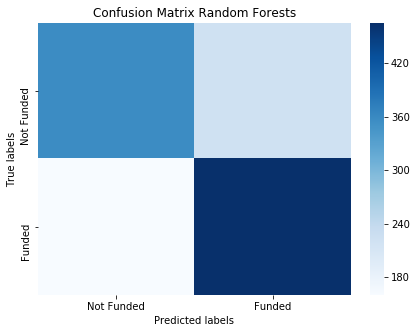

In [34]:
import seaborn as sns

#plotting a confusion matrix
labels = ['Not Funded', 'Funded']
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(confusion_matrix_forest,cmap="Blues",annot=False,fmt='.1f', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Random Forests'); 

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfc)) 

              precision    recall  f1-score   support

           0       0.69      0.62      0.65       580
           1       0.68      0.74      0.71       625

   micro avg       0.68      0.68      0.68      1205
   macro avg       0.68      0.68      0.68      1205
weighted avg       0.68      0.68      0.68      1205



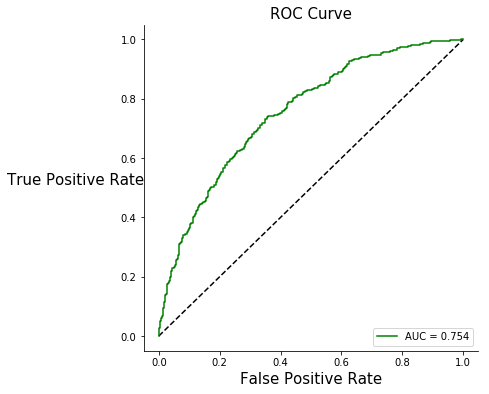

In [36]:
#Plotting AUC

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
from seaborn import despine

logit_roc_auc = roc_auc_score(y_test, rfc_best.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc_best.predict_proba(X_test)[:,1])

roc_auc = auc(fpr,tpr)

plt.figure(figsize=(6,6))


# Plotting our Baseline..
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr,'g',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.title('ROC Curve',fontsize = 15)
plt.xlabel('False Positive Rate',fontsize = 15)
plt.ylabel('True Positive Rate',rotation=0,labelpad=45,fontsize = 15)
despine()

In [37]:
X_features=rfc_best.feature_importances_

In [38]:
X_features

array([0.02280179, 0.0310935 , 0.01559851, 0.02163707, 0.03498702,
       0.04356594, 0.00504   , 0.00963891, 0.02104453, 0.03532643,
       0.02778089, 0.03306128, 0.03029489, 0.00239743, 0.00229771,
       0.04712609, 0.01747071, 0.01962176, 0.03112691, 0.02613107,
       0.05525231, 0.02621528, 0.02413897, 0.04367712, 0.01898758,
       0.05475318, 0.05523168, 0.01816261, 0.03200379, 0.03531349,
       0.01175867, 0.0429911 , 0.02184244, 0.01465169, 0.01067495,
       0.01217813, 0.0174067 , 0.0148439 , 0.011874  ])

In [39]:
X_features_list=list(X_features)
len(X_features_list)

39

In [40]:
columns=['num_sents', 'num_words', 'num_all_caps', 'percent_all_caps',
       'num_exclms', 'percent_exclms', 'num_imp_words', 'percent_imp_words',
       'avg_words_per_sent', 'num_paragraphs', 'avg_sents_per_paragraph','avg_words_per_paragraph',
        'num_images', 'num_videos', 'num_youtubes','num_hyperlinks', 
         'num_bolded', 'percent_bolded', 'sentiment','topic1',
         'Funding Related','topic3','topic4','Design Related',
         'topic6','tech related','Pledge Related','topic9',
         'topic10','topic11','topic12','User Related',
         'topic14','topic15','topic16','topic17',
         'topic18','topic19','topic20']
len(columns)

39

In [41]:
list_name=columns
list_coeff=X_features_list
df_list = pd.DataFrame(
    {'Feature': list_name,
     'Score': list_coeff
    })

df_list=df_list.sort_values(['Score'], ascending=[True])
df_list

,Feature,Score
14,num_youtubes,0.002298
13,num_videos,0.002397
6,num_imp_words,0.005040
7,percent_imp_words,0.009639
34,topic16,0.010675
30,topic12,0.011759
38,topic20,0.011874
35,topic17,0.012178
33,topic15,0.014652
37,topic19,0.014844


Text(0.5,0,'Score')

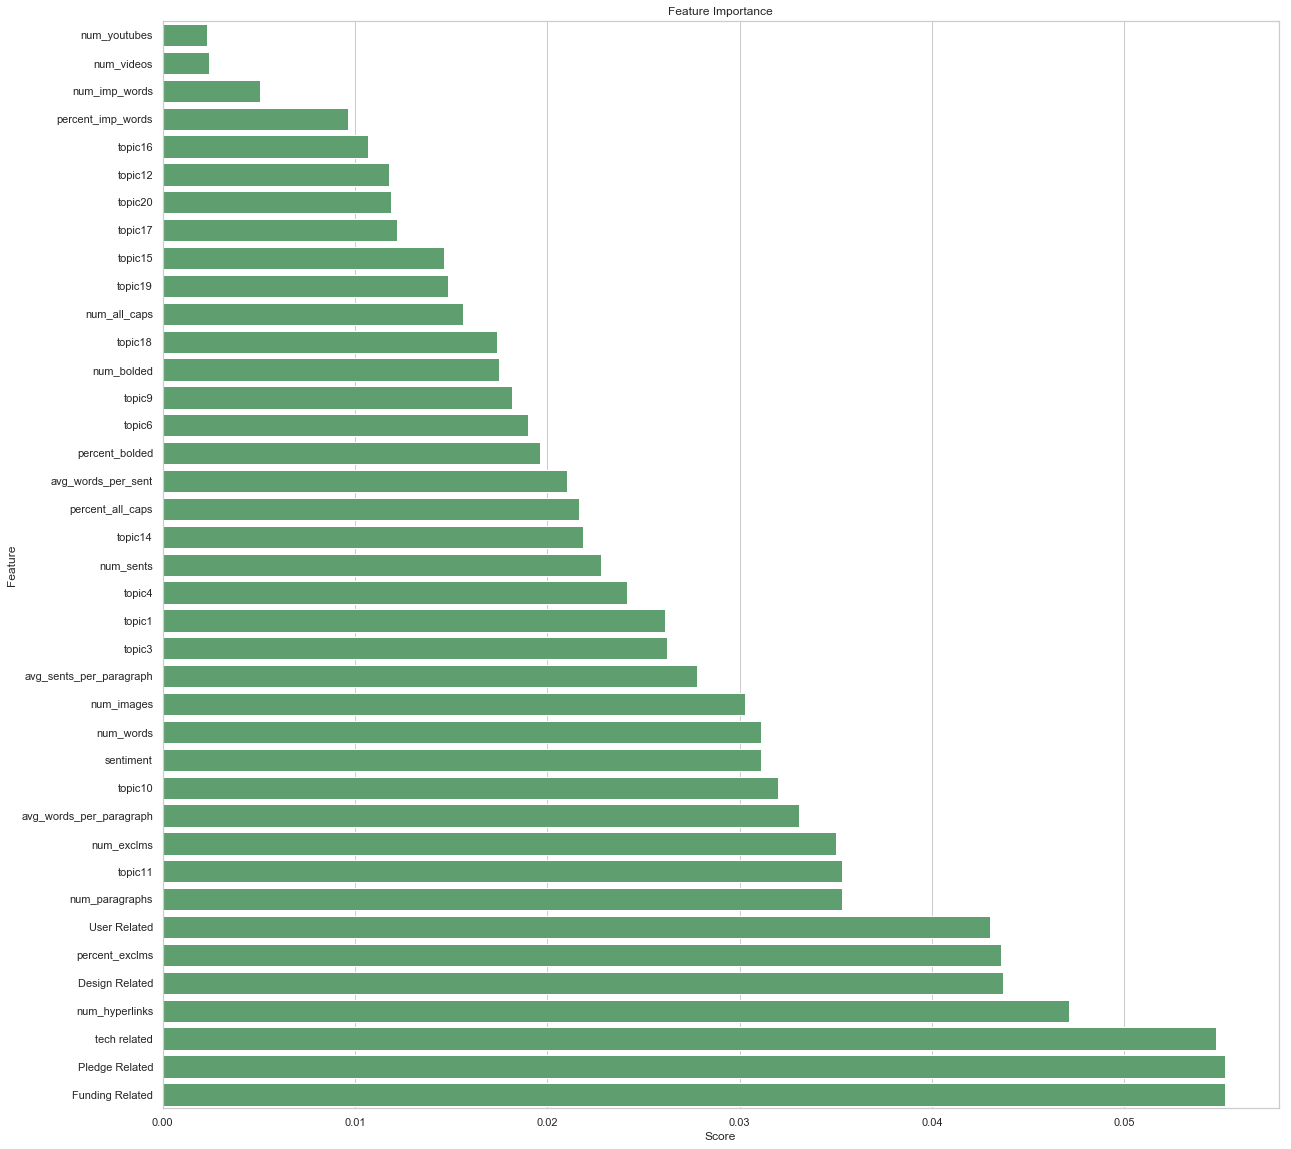

In [42]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(20,20))

ax = sns.barplot(x='Score', y='Feature', data=df_list,color='g')
ax.set_title('Feature Importance')
ax.set_xlabel('Score')

In [43]:
imp_features=[columns[26],columns[25],columns[20],columns[15],columns[5],columns[9]]
names=['Pledge Related','Tech related','Funding Related','num_hyperlinks','%exclams','num_paragraphs']

In [44]:
imp_features

['Pledge Related',
 'tech related',
 'Funding Related',
 'num_hyperlinks',
 'percent_exclms',
 'num_paragraphs']

**Helper Functions**

In [45]:
import re
import unicodedata
import requests

import re
import unicodedata

def remove_punc(text):
    """Remove all punctuation from the text of a campaign section
    
    Args:
        text (str): cleaned and normalized text of a campaign section
    
    Returns:
        a string containing the text of a campaign section without any
        punctuation"""
    
    # Remove punctuation with regex
    return re.sub(r'[^\w\d\s]|\_', ' ', text)


def preprocess_text(text):
    """Perform text preprocessing such as removing punctuation, lowercasing all
    words, removing stop words and stemming remaining words
    
    Args:
        text (str): cleaned and normalized text of a campaign section
    
    Returns:
        a string containing text that has been preprocessed"""
    
    # Access stop word dictionary
    stop_words = set(nltk.corpus.stopwords.words('english'))

    # Prepare the Porter stemmer
    porter = nltk.PorterStemmer()
    
    # Remove punctuation and lowercase each word
    text = remove_punc(text).lower()
    
    # Remove stop words and stem each word
    return ' '.join(
        porter.stem(term )
        for term in text.split()
        if term not in stop_words
    )

In [46]:
def scrape(hyperlink):
    """Use the Requests library to scrape a Kickstarter project page
    
    Args:
        hyperlink (str): URL of the Kickstarter page to scrape
    
    Returns:
        a response object containing the scraped content"""
    
    return requests.get(hyperlink)

def parse(scraped_html):
    """Use the BeautifulSoup library to parse the scraped HTML of a project 
    using an lxml parser
    
    Args:
        scraped_html (response object): the unparsed response object collected
        by the web scraper
    
    Returns:
        a soup object containing the parsed HTML"""
    
    # Parse the HTML content using an lxml parser
    return BeautifulSoup(scraped_html.text, 'lxml')

def cleaning(text):    
    
    # Remove line breaks, leading and trailing whitespace, and compress all
    # whitespace to a single space
    text_cleaned = ' '.join(text.split()).strip()
    
    # Remove the HTML5 warning for videos
    return text_cleaned.replace("You'll need an HTML5 capable browser to see this content. " + \
        "Play Replay with sound Play with sound 00:00 00:00",' ')




In [47]:
def campaign_details(soup):
    
    # Collect the "About this project" section if available
    try:
        section1 = soup.find(
            'div',
            class_='full-description js-full-description responsive-media ' + \
                'formatted-lists'
        ).get_text(' ')
    except AttributeError:
        section1 = 'section_not_found'
    
    # Collect the "Risks and challenges" section if available, and remove all
    # unnecessary text
    try:
        section2 = soup.find(
            'div', 
            class_='mb3 mb10-sm mb3 js-risks'
        ) \
            .get_text(' ') \
            .replace('Risks and challenges',' ') \
            .replace('Learn about accountability on Kickstarter',' ')
    except AttributeError:
        section2 = 'section_not_found'
    
    # Clean both campaign sections
    return {'about': cleaning(section1), 'risks': cleaning(section2)}

def normalize(text):
    
    # Tag email addresses with regex
    normalized = re.sub(
        r'\b[\w\-.]+?@\w+?\.\w{2,4}\b',
        'emailaddr',
        text
    )
    
    # Tag hyperlinks with regex
    normalized = re.sub(
        r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)',
        'httpaddr',
        normalized
    )
    
    # Tag money amounts with regex
    normalized = re.sub(r'\$\d+(\.\d+)?', 'dollramt', normalized)
    
    # Tag percentages with regex
    normalized = re.sub(r'\d+(\.\d+)?\%', 'percntg', normalized)
    
    # Tag phone numbers with regex
    normalized = re.sub(
        r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b',
        'phonenumbr',
        normalized
    )
    
    # Tag remaining numbers with regex
    return re.sub(r'\d+(\.\d+)?', 'numbr', normalized)


In [48]:
def sentences_token(text):
     # Tokenize the text into sentences
    return nltk.sent_tokenize(text)


def punc_cleaning(text):
 
    # Remove punctuation with regex
    return re.sub(r'[^\w\d\s]|\_', ' ', text)


def words_token(text):
    
    # Remove punctuation and then tokenize the text into words
    return [word for word in nltk.word_tokenize(punc_cleaning(text))]


def identify_allcaps(text):
        
    # Identify all-caps words with regex
    return re.findall(r'\b[A-Z]{2,}', text)


def count_exclamations(text):
    
    # Count the number of exclamation marks in the text
    return text.count('!')


def count_imp_words(text):
    # Define a set of adjectives used commonly by Apple marketing team
    # according to https://www.youtube.com/watch?v=ZWPqjXYTqYw
    imp_words = frozenset(
        ['revolutionary', 'breakthrough', 'beautiful', 'magical', 
        'gorgeous', 'amazing', 'incredible', 'awesome']
    )
    
    # Count total number of Apple words in the text
    return sum(1 for word in words_token(text) if word in imp_words)



def compute_avg_words(text):
    
    # Compute the average number of words in each sentence
    return pd.Series(
        [len(words_token(sentence)) for sentence in sentences_token(text)]
    ).mean()



def count_paragraphs(soup, section):    
    
    # Use tree parsing to count the number of paragraphs depending on which
    # section is requested
    if section == 'about':
        return len(soup.find(
            'div',
            class_='full-description js-full-description responsive' + \
                '-media formatted-lists'
        ).find_all('p'))
    elif section == 'risks':
        return len(soup.find(
            'div',
            class_='mb3 mb10-sm mb3 js-risks'
        ).find_all('p'))
    
def compute_avg_sents_paragraph(soup, section):
    #look at 'about' section
    if section == 'about':
        paragraphs = soup.find(
            'div',
            class_='full-description js-full-description responsive' + \
                '-media formatted-lists'
        ).find_all('p')
    elif section == 'risks':
        paragraphs = soup.find(
            'div',
            class_='mb3 mb10-sm mb3 js-risks'
        ).find_all('p')
    
    # Compute the average number of sentences in each paragraph    
    return pd.Series(
        [len(sentences_token(paragraph.get_text(' '))) for paragraph in \
         paragraphs]
    ).mean()


def compute_avg_words_paragraph(soup, section):

    # Use tree parsing to identify all paragraphs depending on which section
    # is requested
    if section == 'about':
        paragraphs = soup.find(
            'div',
            class_='full-description js-full-description responsive' + \
                '-media formatted-lists'
        ).find_all('p')
    elif section == 'risks':
        paragraphs = soup.find(
            'div',
            class_='mb3 mb10-sm mb3 js-risks'
        ).find_all('p')
    
    # Compute the average number of words in each paragraph
    return pd.Series(
        [len(words_token(paragraph.get_text(' '))) for paragraph in paragraphs]
    ).mean()

def count_images(soup, section):    
    
    # Use tree parsing to identify all image tags depending on which section
    # is requested
    if section == 'about':
        return len(soup.find(
            'div',
            class_='full-description js-full-description responsive' + \
                '-media formatted-lists'
        ).find_all('img'))
    elif section == 'risks':
        return len(soup.find(
            'div',
            class_='mb3 mb10-sm mb3 js-risks'
        ).find_all('img'))
    
def count_videos(soup, section):    
    
    # Use tree parsing to count all non-YouTube video tags depending on which
    # section is requested
    if section == 'about':
        return len(soup.find(
            'div',
            class_='full-description js-full-description responsive' + \
                '-media formatted-lists'
        ).find_all('div', class_='video-player'))
    elif section == 'risks':
        return len(soup.find(
            'div',
            class_='mb3 mb10-sm mb3 js-risks'
         ).find_all('div', class_='video-player'))

def count_youtube(soup, section):    
    
    # Initialize total number of YouTube videos
    youtube_count = 0

    # Use tree parsing to identify all iframe tags depending on which section
    # is requested
    if section == 'about':
        iframes = soup.find(
            'div',
            class_='full-description js-full-description responsive' + \
            '-media formatted-lists'
        ).find_all('iframe')
    elif section == 'risks':
        iframes = soup.find(
            'div',
            class_='mb3 mb10-sm mb3 js-risks'
        ).find_all('iframe')
    
    # Since YouTube videos are contained only in iframe tags, determine which
    # iframe tags contain YouTube videos and count them
    for iframe in iframes:
        # Catch any iframes that fail to include a YouTube source link
        try:
            if 'youtube' in iframe.get('src'):
                youtube_count += 1
        except TypeError:
            pass
    
    return youtube_count


def count_hyperlinks(soup, section):    
    """Count the number of hyperlink tags in a campaign section"""
    # Use tree parsing to compute number of hyperlink tags depending on the
    # section requested
    if section == 'about':
        return len(soup.find(
            'div',
            class_='full-description js-full-description responsive' + \
                '-media formatted-lists'
        ).find_all('a'))
    elif section == 'risks':
        return len(soup.find(
            'div',
            class_='mb3 mb10-sm mb3 js-risks'
        ).find_all('a'))
    
def count_bold_tags(soup, section):    
    """Count the number of bold tags in a campaign section"""
    
    # Use tree parsing to compute number of bolded text tags depending on which
    # section is requested
    if section == 'about':
        return len(soup.find(
            'div',
            class_='full-description js-full-description responsive' + \
                '-media formatted-lists'
        ).find_all('b'))
    elif section == 'risks':
        return len(soup.find(
            'div',
            class_='mb3 mb10-sm mb3 js-risks'
        ).find_all('b'))

def remove_punc(sentence): 
    #cleanr = re.compile('<.*?>')
    #cleantext = re.sub(cleanr, ' ', sentence)
    cleantext = str(sentence).lower()
    #cleaned = re.sub(r'[?|!|\'|"|#|$|%]',r'',cleantext)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleantext)
    cleaned = str(cleaned).lower()
    
    return cleaned


def preprocess_text(text):
    """Perform text preprocessing such as removing punctuation, lowercasing all
    words, removing stop words and stemming remaining words"""
    
    # Access stop word dictionary
    stop_words = set(nltk.corpus.stopwords.words('english'))

    # Initialize the Porter stemmer
    porter = nltk.PorterStemmer()
    
    # Remove punctuation and lowercase each word
    text = remove_punc(text).lower()
    
    # Remove stop words and stem each word
    return ' '.join(
        porter.stem(term )
        for term in text.split()
        if term not in set(stop_words)
    )


section1_df_full['sentiment']= section1_df_full['normalized_text'].apply(lambda x : sentiment(x))

In [49]:
def feature_extraction(soup, campaign, section):
    """Extract all the features of the text of campaign section"""
   
    
    # Compute the number of words in the section
    num_words = len(words_token(campaign[section]))
    
    # If the section contains no words, assign NaN to 'num_words' to avoid
    # potential division by zero
    if num_words == 0:
        num_words = np.nan
        
    #If the section isn't available, then return NaN for each meta feature.
    if campaign[section] == 'section_not_found':
        return([np.nan] * 19)
    else:
        return(len(sentences_token(campaign[section])),  #number of the sentence
            num_words,                                # number of words
            len(identify_allcaps(campaign[section])), # number of all_caps
            len(identify_allcaps(campaign[section])) / num_words,  #% of all caps
            count_exclamations(campaign[section]),              #number of exclamations
            count_exclamations(campaign[section]) / num_words,    #% of exclamations
            count_imp_words(campaign[section]),                   #number of buzz words
            count_imp_words(campaign[section]) / num_words,     #% of buzz words
            compute_avg_words(campaign[section]),                #number of avg words
            count_paragraphs(soup, section),                     #number of paragraphs
            compute_avg_sents_paragraph(soup, section),          #number of sentences per paragraph
            compute_avg_words_paragraph(soup, section),          #number of words per paragraph
            count_images(soup, section),                         #number of images
            count_videos(soup, section),                        # number of videos
            count_youtube(soup, section),                       #number of youtube videos
            count_hyperlinks(soup, section),                    #number of hyperlinks
            count_bold_tags(soup, section),                      #number of bold tag
            count_bold_tags(soup, section) / num_words,          #%of bold tags
            sentiment(campaign[section])
        )
        
        
        

In [50]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

def extract_user_features(hyperlink):

    # Scraping HTML content from hyperlink and  parsing it
    scraped_html = scrape(hyperlink)
    soup = parse(scraped_html)

    # Collecting section 'campaign' and normalize text 
    campaign = campaign_details(soup)
    campaign['about'] = normalize(campaign['about'])
    
    
    # Extract features
    user_features = feature_extraction(soup, campaign, 'about')

    # Preprocessing text in the campaign section
    text_clean = preprocess_text(campaign['about'])
    return user_features, text_clean

def sentiment(x):
    score = sid.polarity_scores(x)
    return score['compound']

**Project testing**

In [131]:
#loading model
rfc_best=joblib.load('/Users/shwetapai/Desktop/random_forest.pkl')
vectorizer=joblib.load('/Users/shwetapai/Desktop/vectorizer_250.pkl')
nmf=joblib.load('/Users/shwetapai/Desktop/nmf_250.pkl')
scaler=joblib.load('/Users/shwetapai/Desktop/scaler_250.pkl')

In [51]:

link='https://www.kickstarter.com/projects/rhinocg/rhino-arc-ii-4-axis-robotic-camera-assistant?ref=section-design-tech-featured-project'

In [52]:
import re
from bs4 import BeautifulSoup
# Compute the meta features and preprocess the campaign section
meta_features, processed_section = extract_user_features(link)
#feature_names=('numn_sent','num_words','num_all_caps','%all_caps',
              # 'num_exclam','% exclam','num_imp_words','% imp words',
               #'num_avg_words','num_paragraphs','sent per para',
               #'words per para','num_images','num_videos',
               #'num_youtube_videos','num_hyperlinks','num_bold_tags','%bold_tags')



# Compute the n-grams from the preprocessed text
ngrams = vectorizer.transform([processed_section])

#running nmf
from sklearn.decomposition import NMF

no_topics = 20
nmf_user=nmf.transform(ngrams)


# Standardize the meta features and convert results into a sparse matrix

scaled_meta_features = sparse.csr_matrix([meta_features])



# Concatenate the meta features with the n-gram vector
feature_vector= sparse.hstack([scaled_meta_features, nmf_user])

feature_all=feature_vector.todense()




# Display the probability of being funded
r=rfc_best.predict_proba(feature_all)[0, 1]
r


0.5955821653136902

In [53]:
meta_features

(96,
 1705,
 24,
 0.01407624633431085,
 1,
 0.0005865102639296188,
 1,
 0.0005865102639296188,
 17.760416666666668,
 35,
 2.7714285714285714,
 43.34285714285714,
 46,
 0,
 1,
 9,
 0,
 0.0,
 0.9989)

In [55]:
feature_all_list=feature_all.tolist()
feature_final_list = [item for sublist in feature_all_list for item in sublist]

In [56]:
new_list = np.array(feature_final_list).reshape(1, -1)
new_list

array([[9.60000000e+01, 1.70500000e+03, 2.40000000e+01, 1.40762463e-02,
        1.00000000e+00, 5.86510264e-04, 1.00000000e+00, 5.86510264e-04,
        1.77604167e+01, 3.50000000e+01, 2.77142857e+00, 4.33428571e+01,
        4.60000000e+01, 0.00000000e+00, 1.00000000e+00, 9.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 9.98900000e-01, 1.90574923e-02,
        3.24095473e-03, 0.00000000e+00, 2.65033489e-02, 0.00000000e+00,
        3.49547651e-03, 5.18563252e-02, 0.00000000e+00, 0.00000000e+00,
        3.64688849e-02, 2.69809290e-03, 0.00000000e+00, 1.28860999e-03,
        0.00000000e+00, 0.00000000e+00, 2.93813988e-02, 0.00000000e+00,
        1.82755860e-02, 0.00000000e+00, 2.11869864e-02]])

**Most Predictive Features Graph**

In [63]:
features_predictive=predictive_list=[feature_final_list[26],feature_final_list[25],feature_final_list[20],feature_final_list[15],feature_final_list[5],feature_final_list[9]]
features_predictive

[0.0,
 0.05185632515325678,
 0.003240954728673496,
 9.0,
 0.0005865102639296188,
 35.0]

In [95]:
section1_df_full['hyperlink'][3]

'https://www.kickstarter.com/projects/235508607/donkibot?ref=category_newest'

In [96]:
link='https://www.kickstarter.com/projects/235508607/donkibot?ref=category_newest'

In [111]:
#changing meta_features to look at its effect on predict_proba
def change_feature1(link):
    meta_features, processed_section = extract_user_features(link)
    
    
    #get n_grams of the vector space
    ngrams1 = vectorizer.transform([processed_section])
    
    

    no_topics = 20
    nmf_user1=nmf.transform(ngrams1)


    # Standardize the meta features and convert results into a sparse matrix
    scaled_meta_features1 = sparse.csr_matrix([meta_features])

    # Concatenate the meta features with the n-gram vector
    feature_vector1 = sparse.hstack([scaled_meta_features1, nmf_user1])
    feature_all1=feature_vector1.todense()
    feature_std = scaler.transform(feature_all1)
    feature_list1=feature_all1.tolist()
    feature_final_list = [item for sublist in feature_list1 for item in sublist]
    

    
     # Display the probability of being funded
    r1=rfc_best.predict_proba(feature_all1)[0, 1]
   
    #plotting features with their number
    
    #predictive_list=[feature_final_list[26],feature_final_list[25],feature_final_list[20],feature_final_list[15],feature_final_list[5],feature_final_list[9]]
    #predictive_label=['Pledge Related', 'Tech Related', 'Funding Related','num_hyperlinks' ,'% exclms','num_paragraphs']
    
    #def plot_bar_x(label,value):
    # this is for plotting purpose
        #index = np.arange(len(label))
        #plt.bar(index, value)
       # plt.xlabel('Features', fontsize=15)
       # plt.ylabel('Number', fontsize=15)
        #plt.xticks(index,label, fontsize=15, rotation=90)
        #plt.title('Feature Number')
       # plt.show()
    
   # bar1=plot_bar_x(predictive_label,predictive_list)
    

    
    #changing values of predictive features
    
    list_meta2=feature_final_list.copy()
    for idx, item in enumerate(list_meta2):
        if idx == 26:
            list_meta2[idx] = list_meta2[idx]+15  #increase this
        if idx==25:
            list_meta2[idx] = list_meta2[idx]+5
            
        if idx==20:
            list_meta2[idx] = list_meta2[idx]+4
            
        if idx==15:
            list_meta2[idx] = list_meta2[idx]+5   #increase this
        
        if idx==5:
            list_meta2[idx] = list_meta2[idx]+3
            
        if idx==9:
            list_meta2[idx] = list_meta2[idx]-30
    
    list_reshape= np.array(list_meta2).reshape(1, -1)

    
    r=rfc_best.predict_proba(list_reshape)[0, 1]
    print(r)
    
    predictive_list2=[feature_final_list[26],feature_final_list[25],feature_final_list[20],feature_final_list[15],feature_final_list[5],feature_final_list[9]]
    predictive_label2=['Pledge Related', 'Tech Related', 'Funding Related','num_hyperlinks' ,'% exclms','num_paragraphs']
    
    
    
   # bar2=plot_bar_x(predictive_label2,predictive_list2)
    
    return(r1,r)


        
change_feature1(link)

    
   

0.5394421363762397


(0.5646540000030609, 0.5394421363762397)

**Function Testing**

In [58]:
list_meta2=feature_final_list.copy()
index_list=['Pledge Related','Tech Related','Funding Related','Num_hyperlinks','% exclams','Num_Paragraphs']
final_prob=[]

for idx, item in enumerate(list_meta2):
    if idx == 26:
        index_list_26=[5,15,25,35,200]
        prob_values_26=[]
        for values in index_list_26:
            list_meta2[idx] = list_meta2[idx]+values
            list_reshape2= np.array(list_meta2).reshape(1, -1)
            r=rfc_best.predict_proba(list_reshape2)[0, 1]
            prob_values_26.append(r)
            max_prob_26=max(prob_values_26)
        final_prob.append(max_prob_26)
        
    list_meta3=feature_final_list.copy()

    if idx==25:
        values_increase_list_25=[5,15,25,35]
        prob_values_25=[]
        for values in values_increase_list_25:
            list_meta3[idx] = list_meta3[idx]+values
            list_reshape3= np.array(list_meta3).reshape(1, -1)
            r=rfc_best.predict_proba(list_reshape3)[0, 1]
            prob_values_25.append(r)
            max_prob_25=max(prob_values_25)
        final_prob.append(max_prob_25)
   
    #list_meta4=feature_final_list.copy() 
   # if idx==20:
       # values_increase_list_20=[5,15,25,35]
       # prob_values_20=[]
        #for values in values_increase_list_20:
           # list_meta4[idx] = list_meta4[idx]+values
           # list_reshape4= np.array(list_meta4).reshape(1, -1)
           # r=rfc_best.predict_proba(list_reshape4)[0, 1]
           # prob_values_20.append(r)
          #  max_prob_20=max(prob_values_20)
       # final_prob.append(max_prob_20)
        
    #list_meta5=feature_final_list.copy() 
  #  if idx==15:
       # values_increase_list_15=[5,15,25,35]
       # prob_values_15=[]
       # for values in values_increase_list_15:
           # list_meta5[idx] = list_meta5[idx]+values
            #list_reshape5= np.array(list_meta2).reshape(1, -1)
            #r=rfc_best.predict_proba(list_reshape5)[0, 1]
           # prob_values_15.append(r)
           # max_prob_15=max(prob_values_15)
        #final_prob.append(max_prob_15)
        
   # list_meta6=feature_final_list.copy()  
   # if idx==5:
       # values_increase_list_5=[5,15,25,35]
       # prob_values_5=[]
        #for values in values_increase_list_5:
         #   list_meta6[idx] = list_meta6[idx]+values
          #  list_reshape6= np.array(list_meta6).reshape(1, -1)
           # r=rfc_best.predict_proba(list_reshape6)[0, 1]
          #  prob_values_5.append(r)
           # max_prob_5=max(prob_values_5)
      #  final_prob.append(max_prob_5)
        
   # list_meta7=feature_final_list.copy()   
    #if idx==9:
       # values_increase_list_9=[5,15,25,35]
       # prob_values_9=[]
       # for values in values_increase_list_9:
           # list_meta7[idx] = list_meta7[idx]-values
            #list_reshap9= np.array(list_meta7).reshape(1, -1)
           # r=rfc_best.predict_proba(list_reshape7)[0, 1]
           # prob_values_9.append(r)
            #max_prob_9=max(prob_values_9)
       # final_prob.append(max_prob_9)
    dict_index_prob= dict(zip(index_list,final_prob))
    
max_prob = max(dict_index_prob.values())

max_keys = [k for k, v in dict_index_prob.items() if v == max_prob] 
    
print(max_prob,max_keys)
    


0.5815874234364107 ['Tech Related']


**Testing**

In [59]:
features_predictive=predictive_list=[feature_final_list[26],feature_final_list[25],feature_final_list[20],feature_final_list[15],feature_final_list[5],feature_final_list[9]]
features_predictive

[0.0,
 0.05185632515325678,
 0.003240954728673496,
 9.0,
 0.0005865102639296188,
 35.0]

In [120]:
section1_df_full['hyperlink'][4]

'https://www.kickstarter.com/projects/rickrobotics/the-genesis-robotics-platform?ref=category_newest'

In [125]:
link2='https://www.kickstarter.com/projects/laultimaescena/la-ultima-escena?ref=section-homepage-projectcollection-fresh-favorites'

In [117]:
def find_features(link2):
    meta_features, processed_section = extract_user_features(link)
     
    #get n_grams of the vector space
    ngrams1 = vectorizer.transform([processed_section])
    
    no_topics = 20
    nmf_user1=nmf.transform(ngrams1)

    # Standardize the meta features and convert results into a sparse matrix
    scaled_meta_features1 = sparse.csr_matrix([meta_features])

    # Concatenate the meta features with the n-gram vector
    feature_vector1 = sparse.hstack([scaled_meta_features1, nmf_user1])
    feature_all1=feature_vector1.todense()
    feature_std = scaler.transform(feature_all1)
    r1=rfc_best.predict_proba(feature_all1)[0, 1]
    feature_list1=feature_all1.tolist()
    feature_final_list = [item for sublist in feature_list1 for item in sublist]
     

    final_dict={'Pledge Related':[],'Tech Related':[],'Funding Related':[],'Num_hyperlinks':[],'% exclams':[],'Num_Paragraphs':[]}
    
    list_meta2=feature_final_list.copy()
    for idx, item in enumerate(list_meta2):
        if idx == 26:
            index_list_26=[0,5,15,25,35]
            prob_values_26=[]
            for values in index_list_26:
                list_meta2[idx] = list_meta2[idx]+values
                list_reshape2= np.array(list_meta2).reshape(1, -1)
                r=rfc_best.predict_proba(list_reshape2)[0, 1]
                prob_values_26.append(r)
                dict_index_26= dict(zip(index_list_26,prob_values_26))
                max_prob_26 = max(dict_index_26.values())
                max_keys_26 = [k for k, v in dict_index_26.items() if v == max_prob_26]
            final_dict['Pledge Related'].append(max_prob_26)
            final_dict['Pledge Related'].append(min(max_keys_26))
    
        list_meta7=feature_final_list.copy() 
        if idx==20:
            index_list_20=[0,5,15,25,35]
            prob_values_20=[]
            for values in index_list_20:
                list_meta7[idx] = list_meta7[idx]+values
                list_reshape7= np.array(list_meta7).reshape(1, -1)
                r=rfc_best.predict_proba(list_reshape7)[0, 1]
                prob_values_20.append(r)
                dict_index_20= dict(zip(index_list_20,prob_values_20))
                max_prob_20 = max(dict_index_20.values())
                max_keys_20 = [k for k, v in dict_index_20.items() if v == max_prob_20]
            final_dict['Funding Related'].append(max_prob_20)
            final_dict['Funding Related'].append(min(max_keys_20))
        
        list_meta3=feature_final_list.copy() 
        if idx==25:
            index_list_25=[0,5,15,25,35]
            prob_values_25=[]
            for values in index_list_25:
                list_meta3[idx] = list_meta3[idx]+values
                list_reshape3= np.array(list_meta3).reshape(1, -1)
                r=rfc_best.predict_proba(list_reshape3)[0, 1]
                prob_values_25.append(r)
                dict_index_25= dict(zip(index_list_25,prob_values_25))
                max_prob_25 = max(dict_index_25.values())
                max_keys_25 = [k for k, v in dict_index_25.items() if v == max_prob_25]
            final_dict['Tech Related'].append(max_prob_25)
            final_dict['Tech Related'].append(min(max_keys_25))
        
        list_meta4=feature_final_list.copy() 
        if idx==15:
            index_list_15=[-5,0,5,15,25,35]
            prob_values_15=[]
            for values in index_list_15:
                list_meta4[idx] = list_meta4[idx]+values
                list_reshape4= np.array(list_meta4).reshape(1, -1)
                r=rfc_best.predict_proba(list_reshape4)[0, 1]
                prob_values_15.append(r)
                dict_index_15= dict(zip(index_list_15,prob_values_15))
                max_prob_15 = max(dict_index_15.values())
                max_keys_15 = [k for k, v in dict_index_15.items() if v == max_prob_15]
            final_dict['Num_hyperlinks'].append(max_prob_15)
            final_dict['Num_hyperlinks'].append(min(max_keys_15))
        
        list_meta5=feature_final_list.copy() 
        if idx==5:
            index_list_5=[0,5,15,25,35]
            prob_values_5=[]
            for values in index_list_5:
                list_meta5[idx] = list_meta5[idx]+values
                list_reshape5= np.array(list_meta5).reshape(1, -1)
                r=rfc_best.predict_proba(list_reshape5)[0, 1]
                prob_values_5.append(r)
                dict_index_5= dict(zip(index_list_5,prob_values_5))
                max_prob_5 = max(dict_index_5.values())
                max_keys_5 = [k for k, v in dict_index_5.items() if v == max_prob_5]
            final_dict['% exclams'].append(max_prob_5)
            final_dict['% exclams'].append(min(max_keys_5))
        
        list_meta6=feature_final_list.copy() 
        if idx==9:
            index_list_9=[-5,-1,-10,0,5,15,25,35]
            prob_values_9=[]
            for values in index_list_9:
                list_meta6[idx] = list_meta6[idx]-values
                list_reshape6= np.array(list_meta6).reshape(1, -1)
                r=rfc_best.predict_proba(list_reshape6)[0, 1]
                prob_values_9.append(r)
                dict_index_9= dict(zip(index_list_9,prob_values_9))
                max_prob_9 = max(dict_index_9.values())
                max_keys_9 = [k for k, v in dict_index_9.items() if v == max_prob_9]
            final_dict['Num_Paragraphs'].append(max_prob_9)
            final_dict['Num_Paragraphs'].append(min(max_keys_9))
    
        
    max_prob_final = max(final_dict.values())
    max_keys_final = [k for k, v in final_dict.items() if v == max_prob_final]   
        
    return(r1,max_prob_final,max_keys_final)

In [126]:
find_features(link2)

(0.5646540000030609, [0.5824264492830568, 15], ['Num_hyperlinks'])